<a href="https://colab.research.google.com/github/lathu-24/Machine-Learning/blob/main/2506728_20241682_lathusan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [679]:
#import all required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier

In [680]:
# Display settings
pd.set_option('display.max_columns', None)

# Load dataset
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Show first 5 rows
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [681]:
# Shape of the dataset
df.shape


(7043, 21)

In [682]:
# Replace blanks with NaN
df["TotalCharges"] = df["TotalCharges"].replace(" ", np.nan)

# Convert to numeric
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

# Drop rows where TotalCharges is missing
df.dropna(subset=["TotalCharges"], inplace=True)

df.reset_index(drop=True, inplace=True)

In [683]:

df.drop_duplicates(inplace=True)
print(df.duplicated().sum())

0


In [684]:
df.info()

# Quick statistical summary (numerical features only)
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [685]:
# Check missing values
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [686]:
# Convert the target variable from categorical to numeric
df['Churn'] = df['Churn'].map({"No": 0, "Yes": 1})

# Display the distribution of the target classes
print(df["Churn"].value_counts())

Churn
0    5163
1    1869
Name: count, dtype: int64


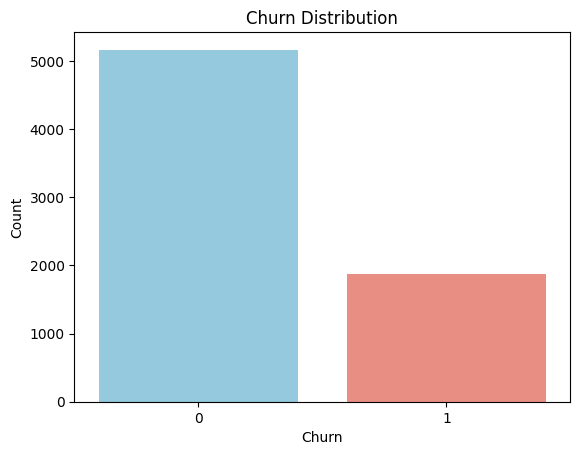

In [687]:
sns.countplot(
    x=df["Churn"],
    hue=df["Churn"],
    palette=["skyblue", "salmon"],
    legend=False
)

plt.title("Churn Distribution")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show()

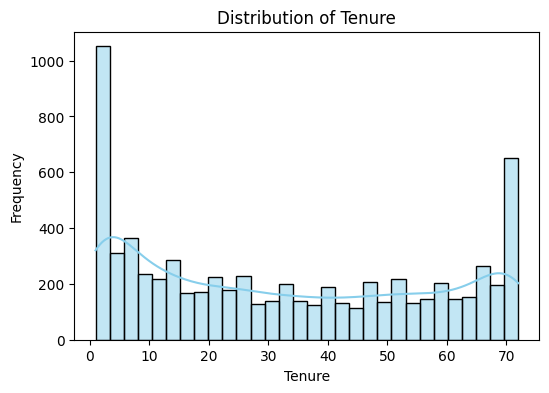

In [688]:
#distribution of tenure
plt.figure(figsize=(6,4))
sns.histplot(df["tenure"], kde=True, bins=30, color="skyblue")
plt.title("Distribution of Tenure")
plt.xlabel("Tenure")
plt.ylabel("Frequency")
plt.show()

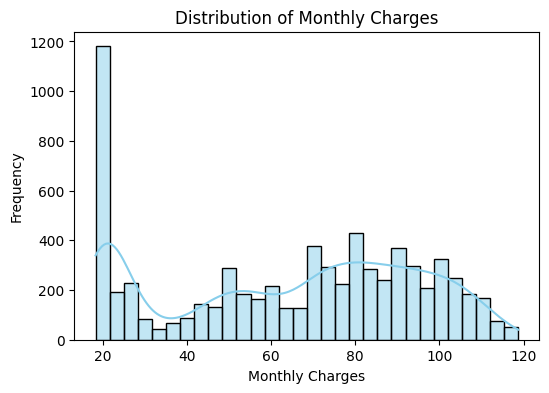

In [689]:
#distribution of monthly charges
plt.figure(figsize=(6,4))
sns.histplot(df["MonthlyCharges"], kde=True, bins=30, color="skyblue")
plt.title("Distribution of Monthly Charges")
plt.xlabel("Monthly Charges")
plt.ylabel("Frequency")
plt.show()

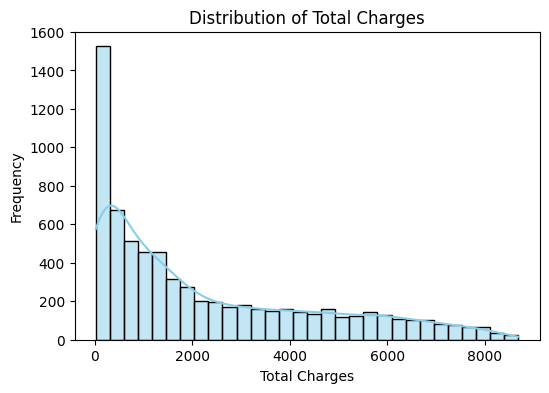

In [690]:
#distribution of total charges
plt.figure(figsize=(6,4))
sns.histplot(df["TotalCharges"], kde=True, bins=30, color="skyblue")
plt.title("Distribution of Total Charges")
plt.xlabel("Total Charges")
plt.ylabel("Frequency")
plt.show()

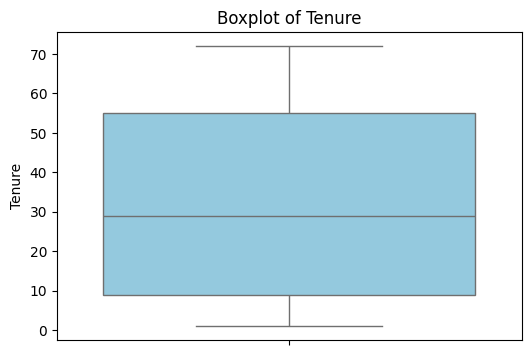

In [691]:
#boxplots of numerical features
plt.figure(figsize=(6,4))
sns.boxplot(y=df["tenure"], color="skyblue")
plt.title("Boxplot of Tenure")
plt.ylabel("Tenure")
plt.show()

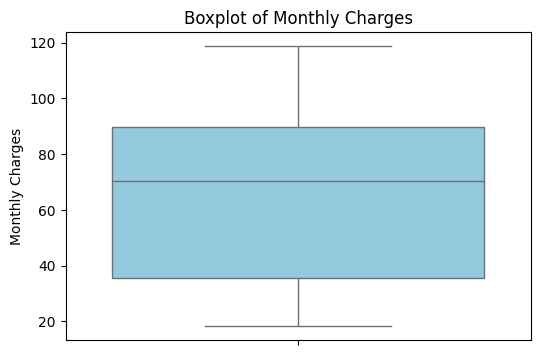

In [692]:
plt.figure(figsize=(6,4))
sns.boxplot(y=df["MonthlyCharges"], color="skyblue")
plt.title("Boxplot of Monthly Charges")
plt.ylabel("Monthly Charges")
plt.show()

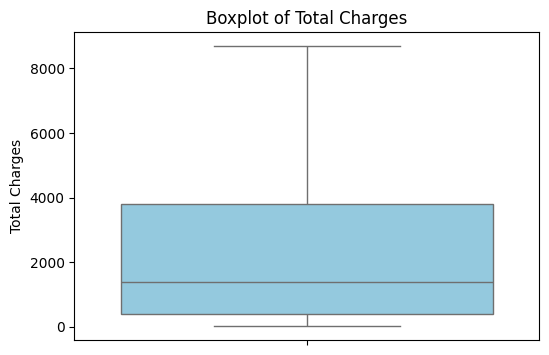

In [693]:
plt.figure(figsize=(6,4))
sns.boxplot(y=df["TotalCharges"], color="skyblue")
plt.title("Boxplot of Total Charges")
plt.ylabel("Total Charges")
plt.show()

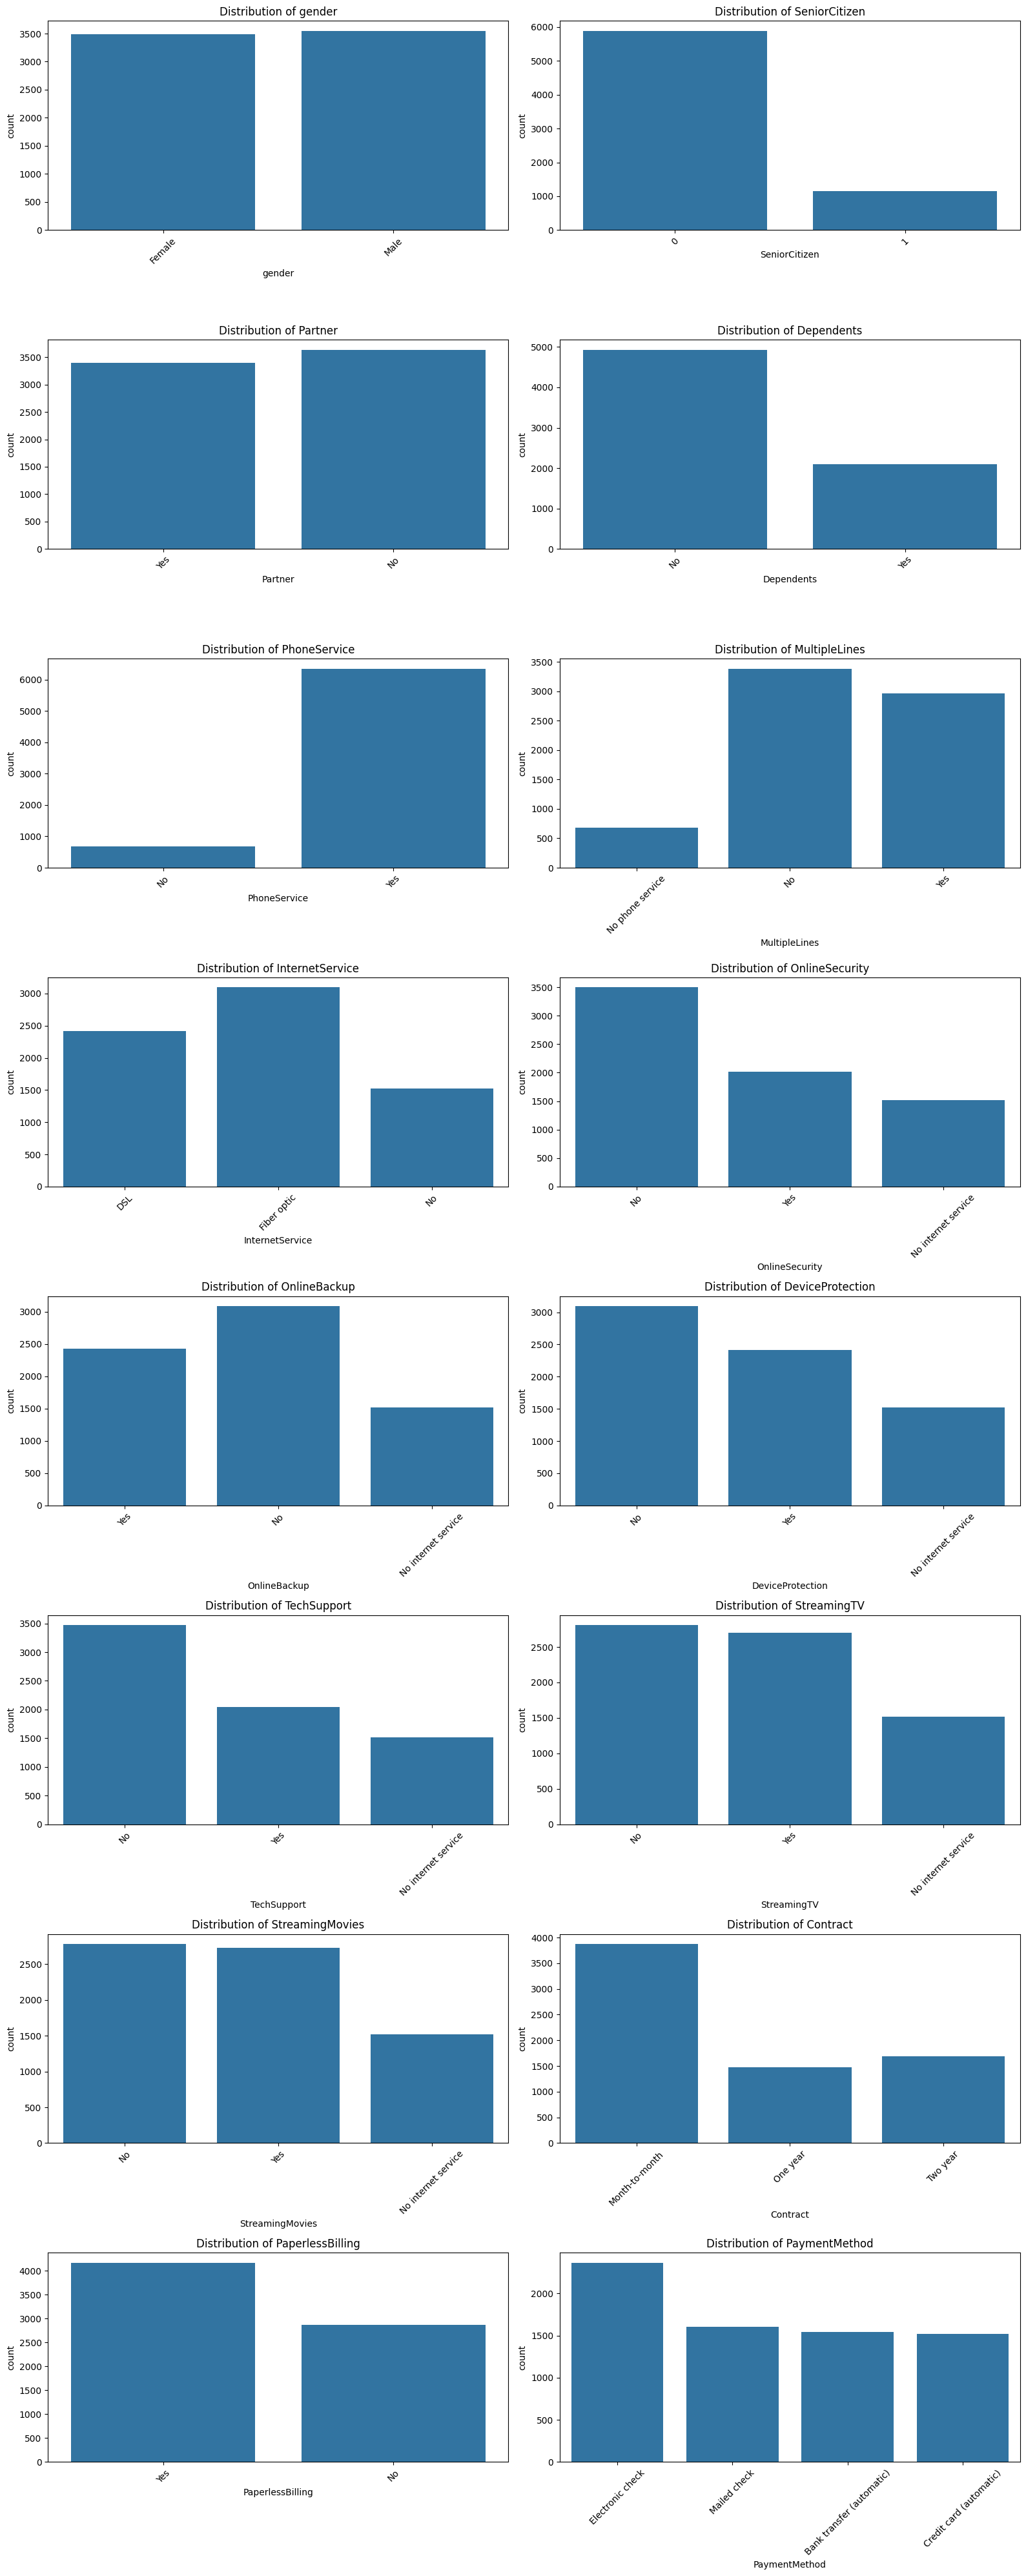

In [694]:
# List of categorical columns to visualize
categorical_cols = [
    'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaperlessBilling', 'PaymentMethod'
]

# Create a large figure to display multiple subplots clearly
plt.figure(figsize=(16, 40))

# Loop through each categorical column and plot its distribution
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(8, 2, i)  # Arrange plots in an 8x2 grid
    sns.countplot(data=df, x=col)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)  # Rotate labels for readability

# Adjust spacing to prevent overlapping
plt.tight_layout()

# Display all plots
plt.show()

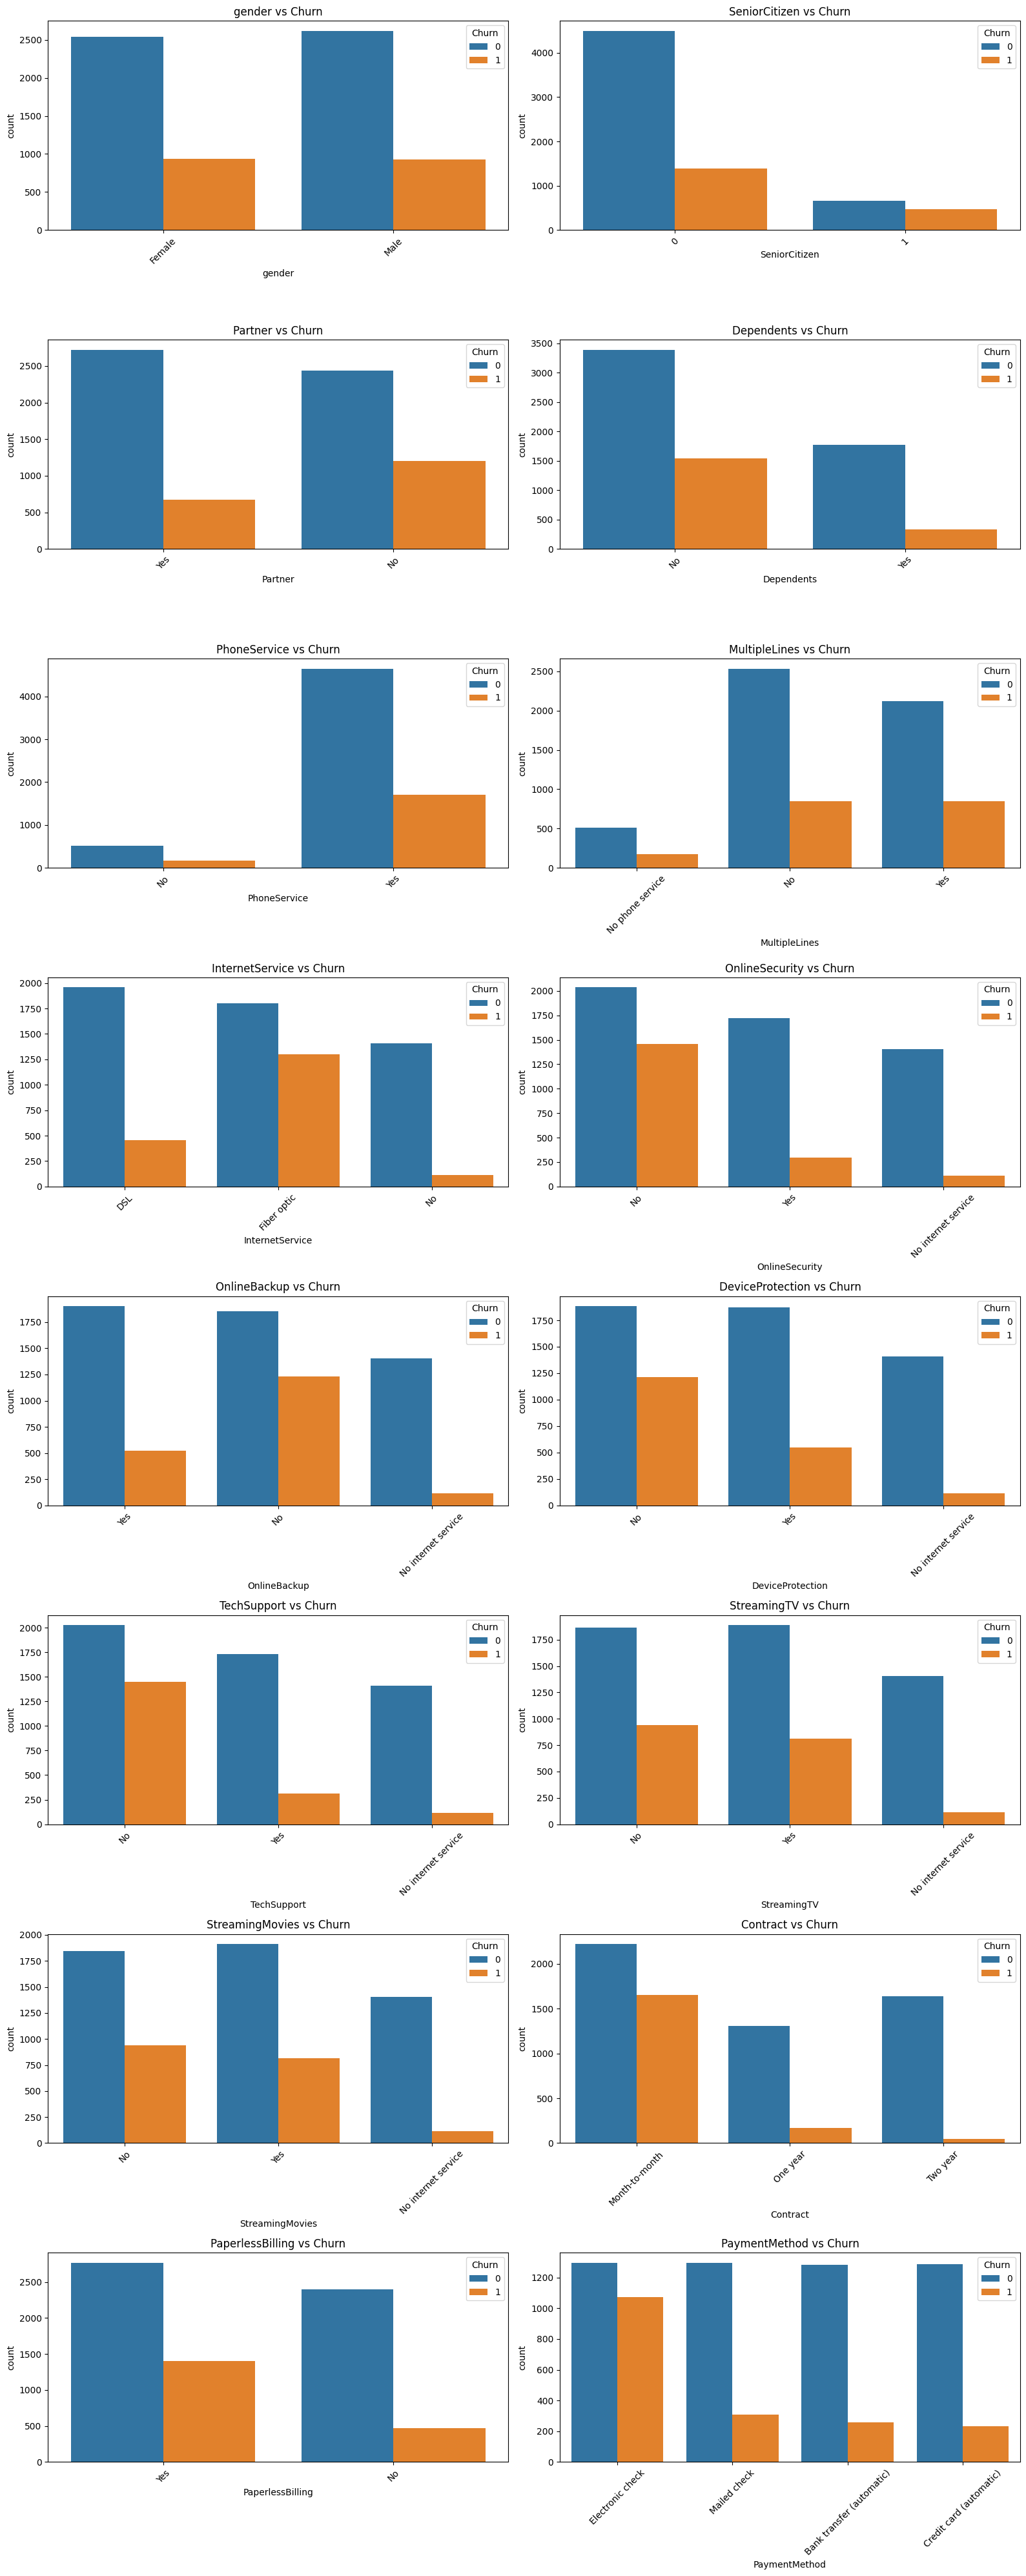

In [695]:
# Visualizing the relationship between each categorical feature and churn

plt.figure(figsize=(16, 40))

# Loop through each categorical column and plot its distribution split by churn status
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(8, 2, i)
    sns.countplot(data=df, x=col, hue="Churn")
    plt.title(f"{col} vs Churn")
    plt.xticks(rotation=45)

# Adjust layout to avoid overlapping elements
plt.tight_layout()

plt.show()

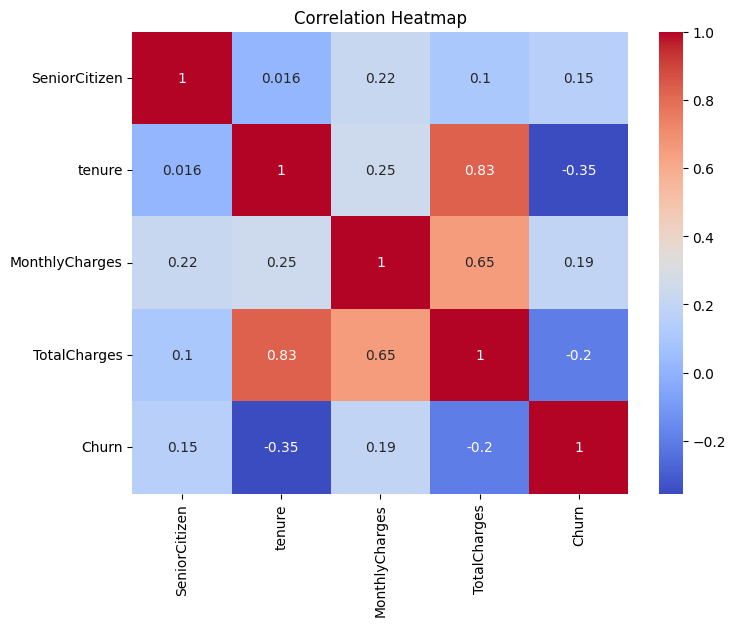

In [696]:
# Select only numeric columns for correlation analysis
# Correlation heatmaps require numerical data types
numeric_df = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(8, 6))

# Plot a heatmap to visualize correlation between numerical features and churn
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")

plt.title("Correlation Heatmap")

# Display the heatmap
plt.show()

In [697]:
#detect the outliers
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
def find_outliers_iqr(column):
    Q1 = df[column].quantile(0.25)   # 25th percentile
    Q3 = df[column].quantile(0.75)   # 75th percentile
    IQR = Q3 - Q1                    # Interquartile Range

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Get rows where outliers exist
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    print(f"Outliers in '{column}': {len(outliers)}")
    print(f"Lower bound: {lower_bound}, Upper bound: {upper_bound}")
    return outliers

In [698]:
for col in numeric_cols:
    print("\n" + "="*50)
    find_outliers_iqr(col)


Outliers in 'tenure': 0
Lower bound: -60.0, Upper bound: 124.0

Outliers in 'MonthlyCharges': 0
Lower bound: -45.824999999999996, Upper bound: 171.27499999999998

Outliers in 'TotalCharges': 0
Lower bound: -4688.481250000001, Upper bound: 8884.66875


In [699]:
# Separate the dataset into features (X) and target variable (y)

# X contains all input features except the target column 'Churn'
df = df.drop("customerID", axis=1)
X = df.drop("Churn", axis=1)

# y contains only the target variable 'Churn' (0 = No churn, 1 = Yes churn)
y = df["Churn"]

In [700]:
# Convert all categorical variables in X into numerical format using One-Hot Encoding.
# get_dummies() creates binary columns for each category.

X = pd.get_dummies(X, drop_first=True)

X.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,True,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,True,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,True,False,False,False,True,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False


In [701]:
# Standardize the feature set to ensure all numerical values are on a similar scale.

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit the scaler on the entire feature set (X) and transform it.
# converts all features to a standard normal distribution (mean=0, std=1).
X_scaled = scaler.fit_transform(X)

In [702]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
#apply smote
sm = SMOTE(random_state=42)

#produce the balanced full dataset
X_bal, y_bal = sm.fit_resample(X, y)

print("Original class distribution:")
print(y.value_counts())

print("\nBalanced distribution after SMOTE:")
print(y_bal.value_counts())

#split the data
X_train_bal, X_test, y_train_bal, y_test = train_test_split(
    X_bal, y_bal,
    test_size=0.2,
    random_state=42,
    stratify=y_bal
)

print("\nTraining set distribution:")
print(y_train_bal.value_counts())

print("\nTest set distribution:")
print(y_test.value_counts())

Original class distribution:
Churn
0    5163
1    1869
Name: count, dtype: int64

Balanced distribution after SMOTE:
Churn
0    5163
1    5163
Name: count, dtype: int64

Training set distribution:
Churn
0    4130
1    4130
Name: count, dtype: int64

Test set distribution:
Churn
0    1033
1    1033
Name: count, dtype: int64


In [703]:

#data validation
import pandas as pd

print("1. Missing Values Check")
print(df.isnull().sum())
print("\nNo missing values remain.\n")

print("2. duplicate Values Check")
df.drop_duplicates(inplace=True)
print(df.duplicated().sum())
print("no duplicates")

print("3. Data Types Check")
print(df.dtypes)
print("\nAll data types are correct.\n")

print("4. Numeric Feature Range Check")
print("Tenure range:", df["tenure"].min(), "to", df["tenure"].max())
print("MonthlyCharges range:", df["MonthlyCharges"].min(), "to", df["MonthlyCharges"].max())
print("TotalCharges range:", df["TotalCharges"].min(), "to", df["TotalCharges"].max())
print("\nNumeric ranges are valid.\n")

print("5. Target Variable Balance (After SMOTE)")
print("Training set distribution:\n", y_train_bal.value_counts())
print("Test set distribution:\n", y_test.value_counts())
print("\nTarget variable is balanced.\n")

print("6. Shape of Split Data")
print("X_train shape:", X_train_bal.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train_bal.shape)
print("y_test shape:", y_test.shape)




1. Missing Values Check
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

No missing values remain.

2. duplicate Values Check
0
no duplicates
3. Data Types Check
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBill

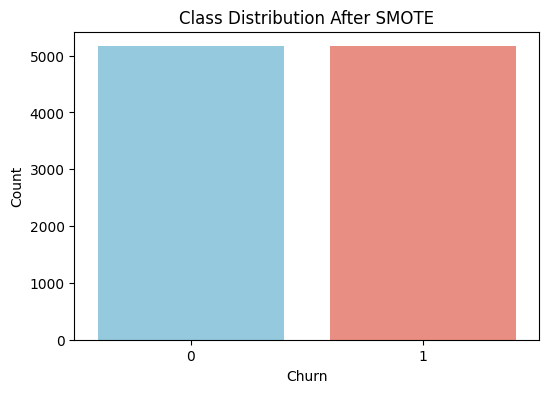

In [704]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))

sns.countplot(
    x=y_bal,
    hue=y_bal,
    palette=["skyblue", "salmon"],
    legend=False
)

plt.title("Class Distribution After SMOTE")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show()

Neural Network Accuracy: 0.7071636011616651
              precision    recall  f1-score   support

           0       0.91      0.46      0.61      1033
           1       0.64      0.96      0.77      1033

    accuracy                           0.71      2066
   macro avg       0.77      0.71      0.69      2066
weighted avg       0.77      0.71      0.69      2066



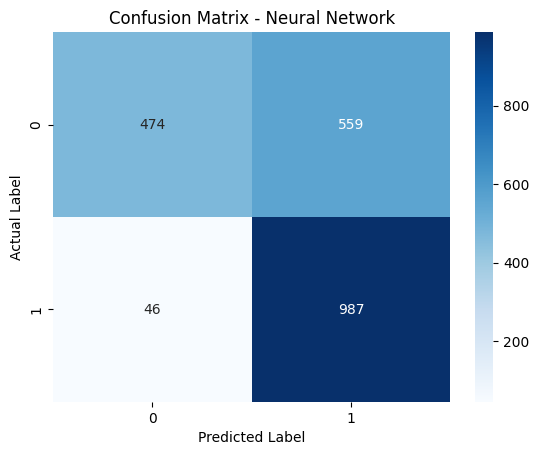

In [705]:
#neural network
# 'relu' activation works well for non-linear relationships.
# 'adam' is an efficient optimizer used for training neural networks.
# max_iter=300 limits training to 300 epochs to ensure convergence.

nn = MLPClassifier(
    hidden_layer_sizes=(64, 32),
    activation='relu',
    solver='adam',
    max_iter=300,
    random_state=42
)

# Train the Neural Network using the SMOTE-balanced training data.
nn.fit(X_train_bal, y_train_bal)

# Make predictions on the test set using the trained Neural Network model
y_pred_nn = nn.predict(X_test)

# Evaluate model performance using accuracy and a detailed classification report
print("Neural Network Accuracy:", accuracy_score(y_test, y_pred_nn))
print(classification_report(y_test, y_pred_nn))

# Generate and visualize the confusion matrix to analyze prediction results
cm = confusion_matrix(y_test, y_pred_nn)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Neural Network")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")

plt.show()

In [706]:
#overfitting check(nn)
train_pred_nn = nn.predict(X_train_bal)
test_pred_nn = nn.predict(X_test)

print("NN Training Accuracy:", accuracy_score(y_train_bal, train_pred_nn))
print("NN Test Accuracy:", accuracy_score(y_test, test_pred_nn))

NN Training Accuracy: 0.7008474576271186
NN Test Accuracy: 0.7071636011616651


In [707]:
#tuning
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

nn_param_grid = {
    'hidden_layer_sizes': [
        (64,),
        (64, 32)
    ],
    'alpha': [0.0001]
}


nn_model = MLPClassifier(
    activation='relu',
    solver='adam',
    max_iter=150,
    random_state=42
)


nn_grid = GridSearchCV(
    estimator=nn_model,
    param_grid=nn_param_grid,
    cv=2,
    scoring='accuracy',
    n_jobs=-1
)

print("Running ULTRA-FAST NN tuning...")

nn_grid.fit(X_train_bal, y_train_bal)

# Best parameters
print("Best NN Parameters:", nn_grid.best_params_)

# Best tuned model
best_nn = nn_grid.best_estimator_

# Predict on test data
y_pred_best_nn = best_nn.predict(X_test)

print("\nTUNED Neural Network Accuracy:", accuracy_score(y_test, y_pred_best_nn))
print(classification_report(y_test, y_pred_best_nn))

Running ULTRA-FAST NN tuning...
Best NN Parameters: {'alpha': 0.0001, 'hidden_layer_sizes': (64,)}

TUNED Neural Network Accuracy: 0.8059051306873185
              precision    recall  f1-score   support

           0       0.83      0.76      0.80      1033
           1       0.78      0.85      0.81      1033

    accuracy                           0.81      2066
   macro avg       0.81      0.81      0.81      2066
weighted avg       0.81      0.81      0.81      2066



NN MODEL COMPARISON
      Metric  Default NN  Tuned NN
0   Accuracy    0.707164  0.805905
1  Precision    0.638422  0.782143
2     Recall    0.955470  0.848015
3   F1-score    0.765413  0.813748


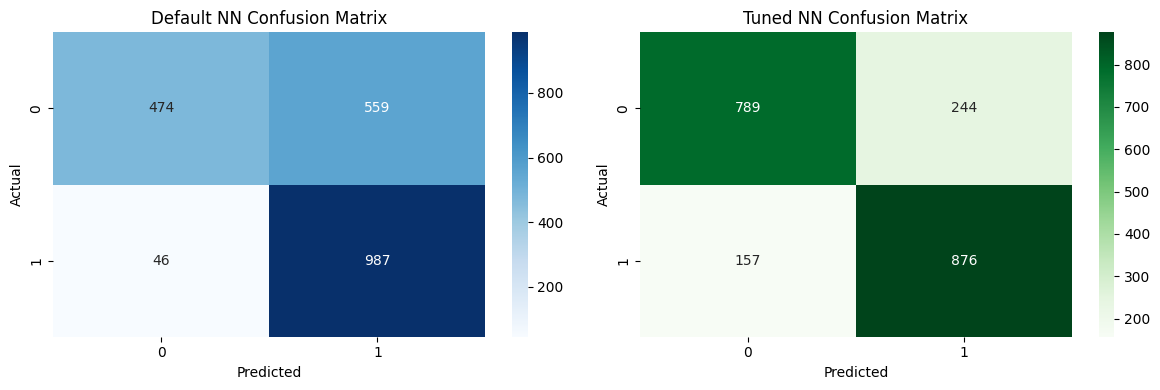

In [708]:
#comparison of default and tuning
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#default model metrics
default_accuracy = accuracy_score(y_test, y_pred_nn)
default_precision = precision_score(y_test, y_pred_nn)
default_recall = recall_score(y_test, y_pred_nn)
default_f1 = f1_score(y_test, y_pred_nn)

#tuned model metrics
tuned_accuracy = accuracy_score(y_test, y_pred_best_nn)
tuned_precision = precision_score(y_test, y_pred_best_nn)
tuned_recall = recall_score(y_test, y_pred_best_nn)
tuned_f1 = f1_score(y_test, y_pred_best_nn)

#Create comparison table
comparison_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-score'],
    'Default NN': [default_accuracy, default_precision, default_recall, default_f1],
    'Tuned NN': [tuned_accuracy, tuned_precision, tuned_recall, tuned_f1]
})

print("NN MODEL COMPARISON")
print(comparison_df)




fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Default NN Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_nn), annot=True, fmt="d",
            cmap="Blues", ax=axes[0])
axes[0].set_title("Default NN Confusion Matrix")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

# Tuned NN Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_best_nn), annot=True, fmt="d",
            cmap="Greens", ax=axes[1])
axes[1].set_title("Tuned NN Confusion Matrix")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()

Decision Tree Accuracy: 0.7957405614714425
              precision    recall  f1-score   support

           0       0.80      0.78      0.79      1033
           1       0.79      0.81      0.80      1033

    accuracy                           0.80      2066
   macro avg       0.80      0.80      0.80      2066
weighted avg       0.80      0.80      0.80      2066



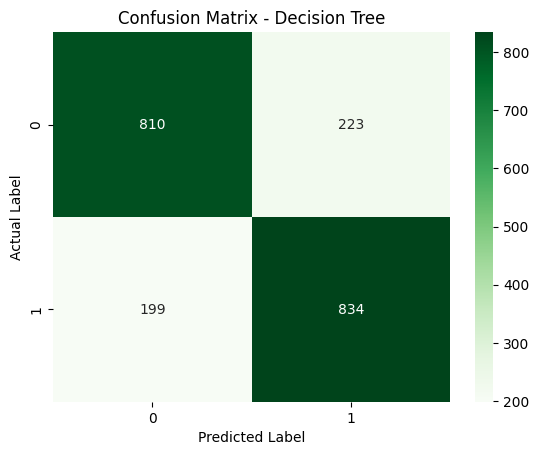

In [709]:
#decision tree
# max_depth=None allows the tree to grow fully, capturing complex patterns.
# random_state=42 ensures reproducibility of results.

dt = DecisionTreeClassifier(max_depth=None, random_state=42)

# Train the Decision Tree model using the SMOTE-balanced training data.
dt.fit(X_train_bal, y_train_bal)

# Make predictions on the test dataset
y_pred_dt = dt.predict(X_test)

# Evaluate model performance using accuracy and classification metrics
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

# Generate and visualize the confusion matrix
cm2 = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm2, annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")

# Display the heatmap
plt.show()

In [710]:
# Train default DT again
dt = DecisionTreeClassifier(max_depth=None, random_state=42)
dt.fit(X_train_bal, y_train_bal)

# Predictions for overfitting check
train_pred = dt.predict(X_train_bal)
test_pred = dt.predict(X_test)

print("DT Training Accuracy:", accuracy_score(y_train_bal, train_pred))
print("DT Test Accuracy:", accuracy_score(y_test, test_pred))

DT Training Accuracy: 0.9990314769975787
DT Test Accuracy: 0.7957405614714425


In [711]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# VERY FAST tuning grid (only essential parameters)
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}

# Base DT model
dt_model = DecisionTreeClassifier(random_state=42)

# Fast GridSearch
dt_grid = GridSearchCV(
    estimator=dt_model,
    param_grid=dt_param_grid,
    cv=2,                 # lower cv = faster
    scoring='accuracy',
    n_jobs=-1
)

print("Running FAST Decision Tree tuning...")

# Fit using SMOTE-balanced training data
dt_grid.fit(X_train_bal, y_train_bal)

# Show best parameters
print("Best Decision Tree Parameters:", dt_grid.best_params_)

# Best model
best_dt = dt_grid.best_estimator_

# Predictions
y_pred_dt_tuned = best_dt.predict(X_test)

# Results
print("\nTuned Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt_tuned))
print(classification_report(y_test, y_pred_dt_tuned))

Running FAST Decision Tree tuning...
Best Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}

Tuned Decision Tree Accuracy: 0.8102613746369797
              precision    recall  f1-score   support

           0       0.84      0.77      0.80      1033
           1       0.79      0.85      0.82      1033

    accuracy                           0.81      2066
   macro avg       0.81      0.81      0.81      2066
weighted avg       0.81      0.81      0.81      2066



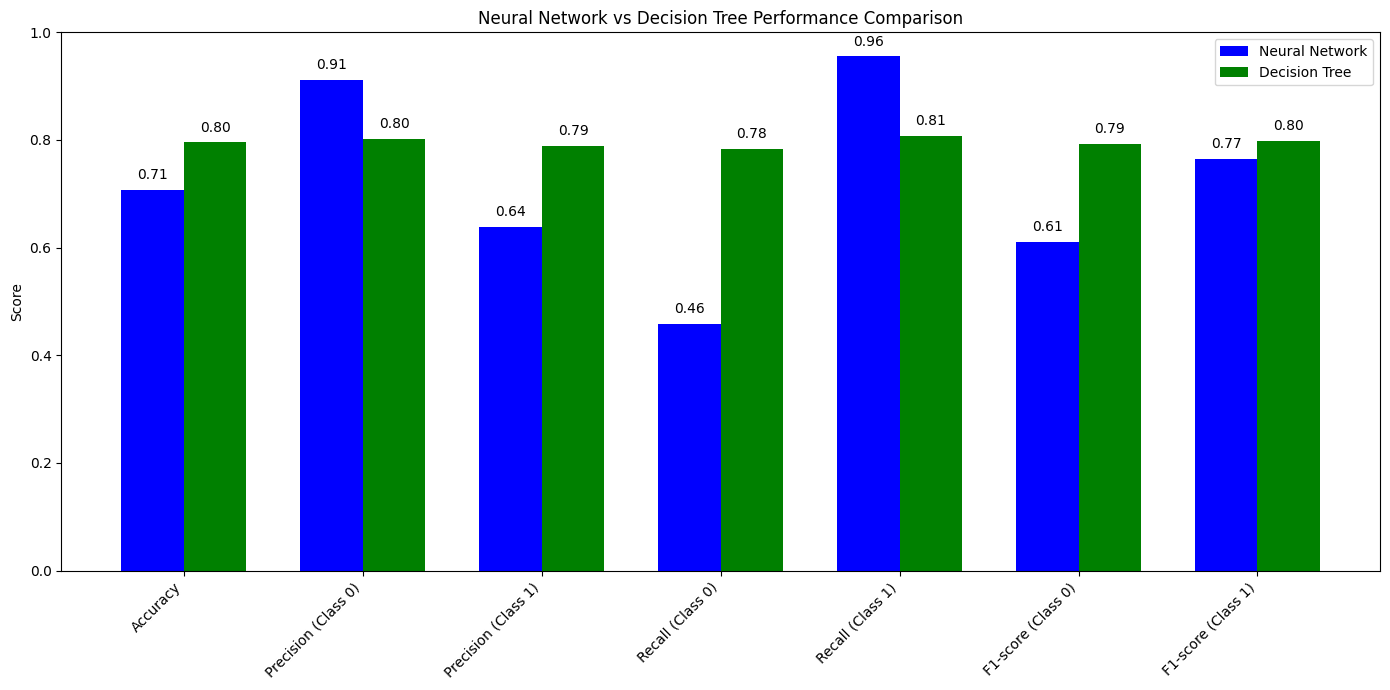

In [712]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
import numpy as np
#calculate all metrics for nn
nn_acc = accuracy_score(y_test, y_pred_nn)
nn_prec_0 = precision_score(y_test, y_pred_nn, pos_label=0)
nn_prec_1 = precision_score(y_test, y_pred_nn, pos_label=1)

nn_rec_0 = recall_score(y_test, y_pred_nn, pos_label=0)
nn_rec_1 = recall_score(y_test, y_pred_nn, pos_label=1)

nn_f1_0 = f1_score(y_test, y_pred_nn, pos_label=0)
nn_f1_1 = f1_score(y_test, y_pred_nn, pos_label=1)

#calculate all metrics for dt
dt_acc = accuracy_score(y_test, y_pred_dt)
dt_prec_0 = precision_score(y_test, y_pred_dt, pos_label=0)
dt_prec_1 = precision_score(y_test, y_pred_dt, pos_label=1)

dt_rec_0 = recall_score(y_test, y_pred_dt, pos_label=0)
dt_rec_1 = recall_score(y_test, y_pred_dt, pos_label=1)

dt_f1_0 = f1_score(y_test, y_pred_dt, pos_label=0)
dt_f1_1 = f1_score(y_test, y_pred_dt, pos_label=1)

#organize metrics for plotting
categories = [
    "Accuracy",
    "Precision (Class 0)", "Precision (Class 1)",
    "Recall (Class 0)", "Recall (Class 1)",
    "F1-score (Class 0)", "F1-score (Class 1)"
]

nn_scores = [nn_acc, nn_prec_0, nn_prec_1, nn_rec_0, nn_rec_1, nn_f1_0, nn_f1_1]
dt_scores = [dt_acc, dt_prec_0, dt_prec_1, dt_rec_0, dt_rec_1, dt_f1_0, dt_f1_1]

x = np.arange(len(categories))
width = 0.35

plt.figure(figsize=(14, 7))

# Bars
plt.bar(x - width/2, nn_scores, width, label='Neural Network', color='blue')
plt.bar(x + width/2, dt_scores, width, label='Decision Tree', color='green')

# Labels
plt.xticks(x, categories, rotation=45, ha='right')
plt.ylabel("Score")
plt.title("Neural Network vs Decision Tree Performance Comparison")
plt.ylim(0, 1)
plt.legend()

# Add values on top of bars
for i, v in enumerate(nn_scores):
    plt.text(i - width/2, v + 0.02, f"{v:.2f}", ha='center')

for i, v in enumerate(dt_scores):
    plt.text(i + width/2, v + 0.02, f"{v:.2f}", ha='center')

plt.tight_layout()
plt.show()